# 12. autoReg 패키지를 이용한 생존분석

In [8]:
library(autoReg)
library(survival)
library(tidyverse)
library(rrtable)

# 
### 예제 : 결장암 데이터 분석

In [4]:
data(cancer, package = "survival")

In [5]:
gaze(colon)

name,desc,stats,id
<chr>,<chr>,<chr>,<chr>
id,Mean ± SD,465.0 ± 268.3,id
study,Mean ± SD,1.0 ± 0.0,study
rx,Obs,630 (33.9%),rxObs
,Lev,620 (33.4%),rxLev
,Lev+5FU,608 (32.7%),rxLev+5FU
sex,Mean ± SD,0.5 ± 0.5,sex
age,Mean ± SD,59.8 ± 11.9,age
obstruct,Mean ± SD,0.2 ± 0.4,obstruct
perfor,Mean ± SD,0.0 ± 0.2,perfor


# 
#### 고전적인 방법에 의한 회귀모형 선택
- 일반 단변량 회귀분석을 통한 후진제거법

# 
1. 단변량분석을 통한 예측변수 선택 (콕스비례위험)
- ```time``` : 시간변수 / ```status``` : 반응변수 / 그 외 : 설명변수

# 
2. 모든 설명변수들을 포함한 모형을 만들기 전, 변수들 중 하나의 설명변수만 포함된 모형을 만들어 어느 정도 유의한 p-value를 보이는 예측변수들을 선택
- 단변량분석에서 p-value가 0.2 이하인 예측변수들을 골라 콕스비례위험모형을 생성

# 
- ```rx``` : Obs(ervation), Lev(amisole), Lev(amisole) + 5FU, 3가지 군을 비교한 데이터
    - Obs(관찰구)dp qlgo Lev(amisole) + 5FU군이 유의하게 위험을 감소시킴

In [11]:
fit1 = coxph(Surv(time, status) ~ rx, colon)
gaze(fit1) %>% myft()

a flextable object.
col_keys: ` `, `coef`, `se(coef)`, `z`, `Pr(>|z|)`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 2 row(s) 
original dataset sample: 
————————————————————————————————————————————————————————————————————
               coef  se(coef)       z  Pr(>|z|)     HR  lower  upper 
————————————————————————————————————————————————————————————————————
rxLev        -0.021     0.077  -0.272      .786  0.979  0.842  1.138 
rxLev+5FU    -0.441     0.084  -5.256     <.001  0.643  0.546  0.758 
————————————————————————————————————————————————————————————————————
n=1858, events=920, Likelihood ratio test=35.23 on 2 df (p<.001) 

# 
- 성별을 예측변수로 하는 모형에서 ```sex```의 회귀계수는 유의하지 않음

In [13]:
coxph(Surv(time, status) ~ sex, colon) %>% gaze()

,,coef,se(coef),z,Pr(>|z|),HR,lower,upper
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
sex,sex,-0.034,0.066,-0.510,.610,0.967,0.850,1.100


# 
- 단변량분석에서 ```sex```, ```age```를 제외한 변수들은 모두 p-value가 0.2이하로 어느정도 통계적 유의성을 가짐

In [ ]:
coxph(Surv(time, status) ~ obstruct, colon) %>% gaze() %>% myft()
coxph(Surv(time, status) ~ perfor, colon) %>% gaze() %>% myft()
coxph(Surv(time, status) ~ adhere, colon) %>% gaze() %>% myft()
coxph(Surv(time, status) ~ nodes, colon) %>% gaze() %>% myft()
coxph(Surv(time, status) ~ differ, colon) %>% gaze() %>% myft()
coxph(Surv(time, status) ~ extent, colon) %>% gaze() %>% myft()
coxph(Surv(time, status) ~ surg, colon) %>% gaze() %>% myft()

# 
3. 여러 설명변수들을 갖는 콕스모형 

In [15]:
fit = coxph(Surv(time, status) ~ rx + obstruct + perfor + adhere + nodes + differ + extent + surg, colon)
gaze(fit) %>% myft()

a flextable object.
col_keys: ` `, `coef`, `se(coef)`, `z`, `Pr(>|z|)`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 9 row(s) 
original dataset sample: 
————————————————————————————————————————————————————————————————————
               coef  se(coef)       z  Pr(>|z|)     HR  lower  upper 
————————————————————————————————————————————————————————————————————
rxLev        -0.064     0.079  -0.810      .418  0.938  0.803  1.096 
rxLev+5FU    -0.425     0.086  -4.945     <.001  0.654  0.552  0.774 
obstruct      0.196     0.084   2.333      .020  1.217  1.032  1.435 
perfor        0.056     0.186   0.301      .764  1.057  0.734  1.523 
adhere        0.183     0.092   1.976      .048  1.200  1.001  1.439 
————————————————————————————————————————————————————————————————————
n=1776, events=876, Likelihood ratio test=224.4 on 9 df (p<.001) 

# 
4. 단계적 회귀를 통한 최종모형 선택

In [17]:
colSums(is.na(colon))

id    study       rx      sex      age obstruct   perfor   adhere 
       0        0        0        0        0        0        0        0 
   nodes   status   differ   extent     surg    node4     time    etype 
      36        0       46        0        0        0        0        0

In [18]:
colon1 = na.omit(colon)
colSums(is.na(colon1))

id    study       rx      sex      age obstruct   perfor   adhere 
       0        0        0        0        0        0        0        0 
   nodes   status   differ   extent     surg    node4     time    etype 
       0        0        0        0        0        0        0        0

In [19]:
fit = coxph(Surv(time, status) ~ rx + obstruct + perfor + adhere + nodes + differ + extent + surg, colon1)
fit

Call:
coxph(formula = Surv(time, status) ~ rx + obstruct + perfor + 
    adhere + nodes + differ + extent + surg, data = colon1)

               coef exp(coef)  se(coef)      z        p
rxLev     -0.064268  0.937754  0.079358 -0.810  0.41803
rxLev+5FU -0.425361  0.653534  0.086025 -4.945 7.63e-07
obstruct   0.196481  1.217112  0.084200  2.333  0.01962
perfor     0.055905  1.057497  0.185969  0.301  0.76371
adhere     0.182706  1.200462  0.092455  1.976  0.04814
nodes      0.082214  1.085688  0.006677 12.312  < 2e-16
differ     0.129337  1.138074  0.070398  1.837  0.06617
extent     0.457473  1.580076  0.082511  5.544 2.95e-08
surg       0.243383  1.275557  0.074207  3.280  0.00104

Likelihood ratio test=224.4  on 9 df, p=< 2.2e-16
n= 1776, number of events= 876 

In [20]:
final = step(fit)

Start:  AIC=12293.84
Surv(time, status) ~ rx + obstruct + perfor + adhere + nodes + 
    differ + extent + surg

           Df   AIC
- perfor    1 12292
<none>        12294
- differ    1 12295
- adhere    1 12296
- obstruct  1 12297
- surg      1 12302
- rx        2 12318
- extent    1 12325
- nodes     1 12403

Step:  AIC=12291.93
Surv(time, status) ~ rx + obstruct + adhere + nodes + differ + 
    extent + surg

           Df   AIC
<none>        12292
- differ    1 12293
- adhere    1 12294
- obstruct  1 12296
- surg      1 12300
- rx        2 12316
- extent    1 12323
- nodes     1 12402


In [22]:
gaze(final) %>% myft()

a flextable object.
col_keys: ` `, `coef`, `se(coef)`, `z`, `Pr(>|z|)`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 8 row(s) 
original dataset sample: 
————————————————————————————————————————————————————————————————————
               coef  se(coef)       z  Pr(>|z|)     HR  lower  upper 
————————————————————————————————————————————————————————————————————
rxLev        -0.064     0.079  -0.802      .423  0.938  0.803  1.096 
rxLev+5FU    -0.425     0.086  -4.938     <.001  0.654  0.553  0.774 
obstruct      0.200     0.083   2.402      .016  1.222  1.037  1.438 
adhere        0.187     0.091   2.060      .039  1.206  1.009  1.442 
nodes         0.082     0.007  12.312     <.001  1.086  1.072  1.100 
————————————————————————————————————————————————————————————————————
n=1776, events=876, Likelihood ratio test=224.32 on 8 df (p<.001) 

# 
# 
### autoReg 패키지를 이용한 분석

In [27]:
fit = coxph(Surv(time, status) ~ rx + sex + age + obstruct + perfor + adhere + nodes + differ + extent + surg, colon)
result <- autoReg(fit, uni = T, final = T) %>% myft()

In [28]:
result

name,desc,stats,id,HR (univariable),HR (multivariable),HR (final)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rx,Obs,610 (34.3%),rxObs,,,
,Lev,588 (33.1%),rxLev,"0.98 (0.84-1.14, p=.786)","0.94 (0.80-1.10, p=.418)","0.94 (0.80-1.10, p=.423)"
,Lev+5FU,578 (32.5%),rxLev+5FU,"0.64 (0.55-0.76, p<.001)","0.65 (0.55-0.77, p<.001)","0.65 (0.55-0.77, p<.001)"
sex,Mean ± SD,0.5 ± 0.5,sex,"0.97 (0.85-1.10, p=.610)",,
age,Mean ± SD,59.8 ± 11.9,age,"1.00 (0.99-1.00, p=.382)",,
obstruct,Mean ± SD,0.2 ± 0.4,obstruct,"1.27 (1.09-1.49, p=.003)","1.22 (1.03-1.44, p=.020)","1.22 (1.04-1.44, p=.016)"
perfor,Mean ± SD,0.0 ± 0.2,perfor,"1.30 (0.92-1.85, p=.142)","1.06 (0.73-1.52, p=.764)",
adhere,Mean ± SD,0.1 ± 0.4,adhere,"1.37 (1.16-1.62, p<.001)","1.20 (1.00-1.44, p=.048)","1.21 (1.01-1.44, p=.039)"
nodes,Mean ± SD,3.7 ± 3.5,nodes,"1.09 (1.08-1.10, p<.001)","1.09 (1.07-1.10, p<.001)","1.09 (1.07-1.10, p<.001)"


# 
#### ```rrtable::table2pptx()``` : 파워포인트 파일로 저장

In [29]:
table2pptx(result)

Exported table as Report.pptx



# 
#### ```modelPlot()``` : 단변량모형과 다중모형의 위험비 시각화

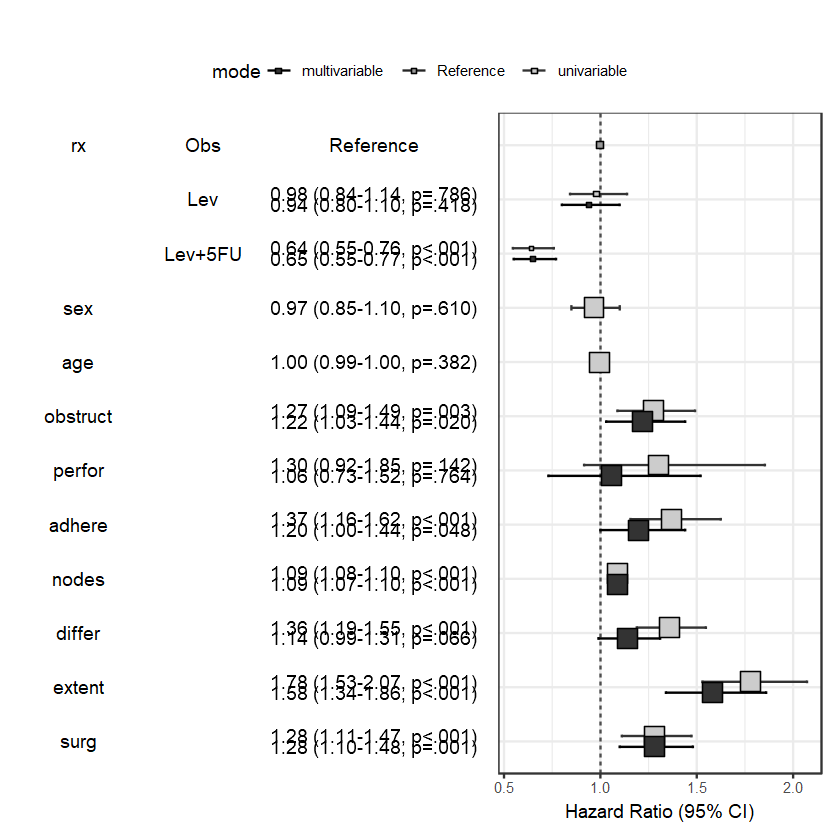

In [26]:
modelPlot(fit , uni = T)

- 최종모형의 위험비

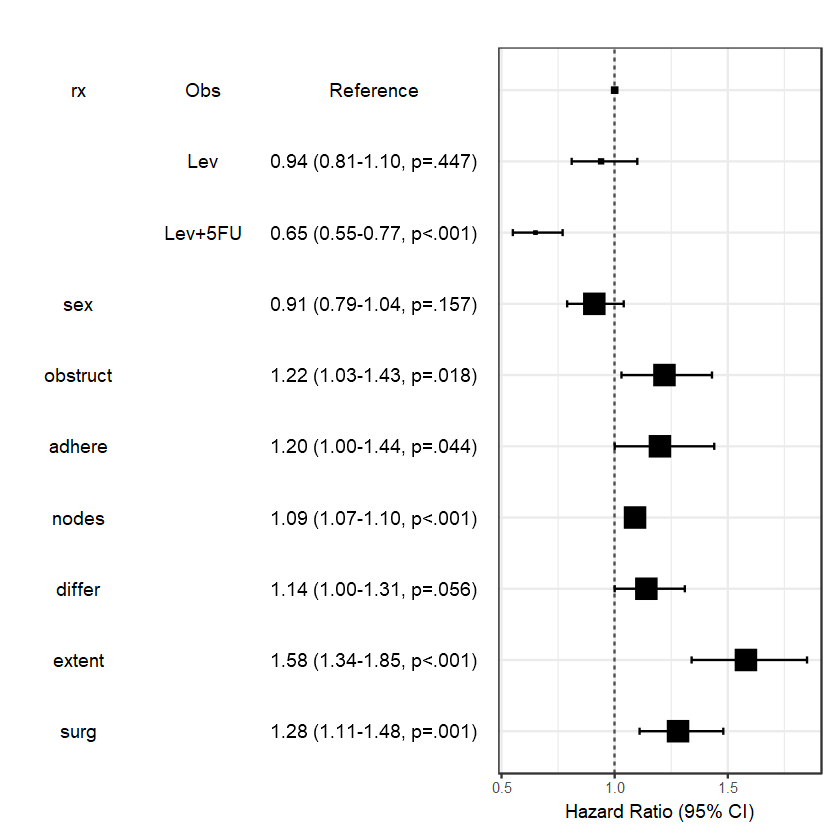

In [31]:
(x = modelPlot(fit, multi = F, final = T))

- 파워포인트 파일에 추가

Exported plot as Report.pptx



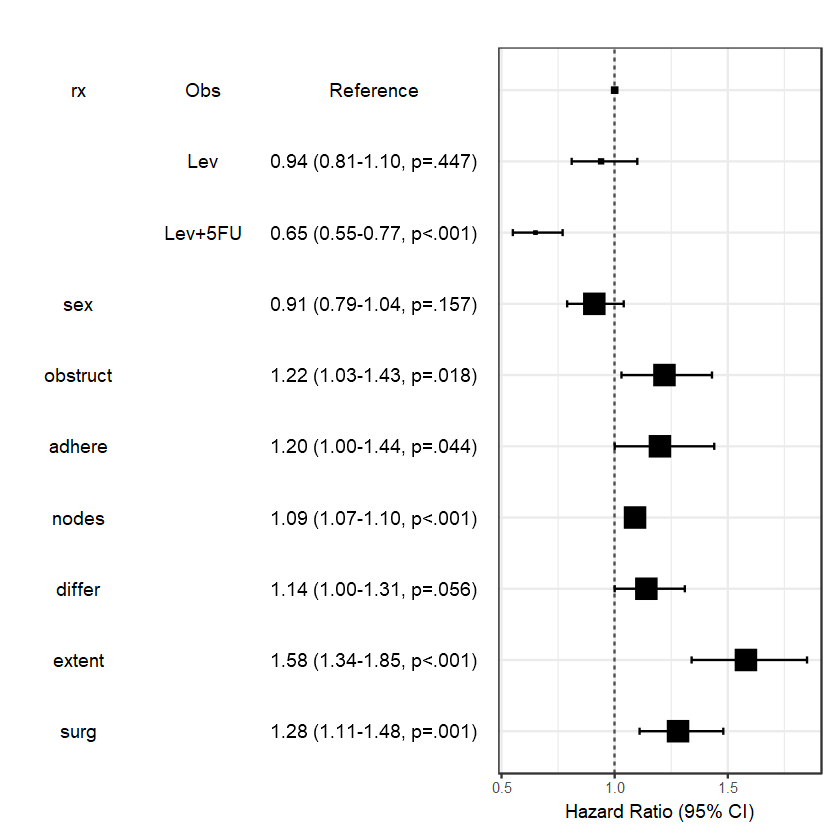

In [32]:
plot2pptx(print(x), append = T)